# CNN MNIST

### 3x3 Kernel & 2x2 Pooling with Dropout

In [15]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.2718 - acc: 0.9158 - val_loss: 0.0587 - val_acc: 0.9812
Epoch 2/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0877 - acc: 0.9747 - val_loss: 0.0387 - val_acc: 0.9868
Epoch 3/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0661 - acc: 0.9800 - val_loss: 0.0317 - val_acc: 0.9893
Epoch 4/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0530 - acc: 0.9846 - val_loss: 0.0329 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0468 - acc: 0.9860 - val_loss: 0.0315 - val_acc: 0.9891
Epoch 6/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0410 - acc: 0.9876 - val_loss: 0.0281 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================]

#### Plotting

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty,  colors=['b']):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Categorical Crossentropy Loss')
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

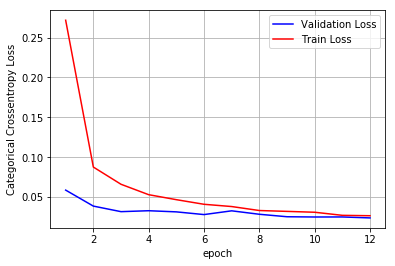

In [19]:
vy = history.history['val_loss']
ty = history.history['loss']
x = list(range(1,epochs+1))

plt_dynamic(x, vy, ty)


### 5x5 Kernel & 4x4 Pooling With Dropout

In [20]:
epochs = 12
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 86us/step - loss: 0.2547 - acc: 0.9209 - val_loss: 0.0561 - val_acc: 0.9823
Epoch 2/12
60000/60000 [==============================] - 4s 72us/step - loss: 0.0882 - acc: 0.9733 - val_loss: 0.0375 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 4s 73us/step - loss: 0.0678 - acc: 0.9798 - val_loss: 0.0304 - val_acc: 0.9897
Epoch 4/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0583 - acc: 0.9832 - val_loss: 0.0235 - val_acc: 0.9926
Epoch 5/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.0495 - acc: 0.9852 - val_loss: 0.0229 - val_acc: 0.9920
Epoch 6/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0431 - acc: 0.9871 - val_loss: 0.0244 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================]

#### Plotting

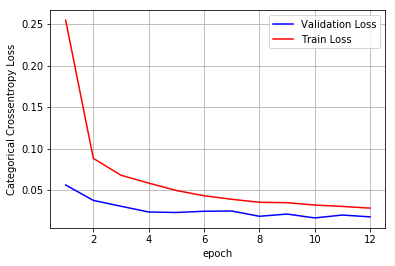

In [21]:
vy = history.history['val_loss']
ty = history.history['loss']
x = list(range(1,epochs+1))

plt_dynamic(x, vy, ty)

### 7x7 Kernel & 3x3 Pooling With DropOut And BatchNormalization

In [22]:
from keras.layers import BatchNormalization
epochs = 12
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.1687 - acc: 0.9489 - val_loss: 0.0480 - val_acc: 0.9851
Epoch 2/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0609 - acc: 0.9816 - val_loss: 0.0319 - val_acc: 0.9885
Epoch 3/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0436 - acc: 0.9868 - val_loss: 0.0303 - val_acc: 0.9902
Epoch 4/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0361 - acc: 0.9888 - val_loss: 0.0308 - val_acc: 0.9905
Epoch 5/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0284 - acc: 0.9909 - val_loss: 0.0293 - val_acc: 0.9902
Epoch 6/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0261 - acc: 0.9922 - val_loss: 0.0254 - val_acc: 0.9912
Epoch 7/12
60000/60000 [==============================

#### Plotting

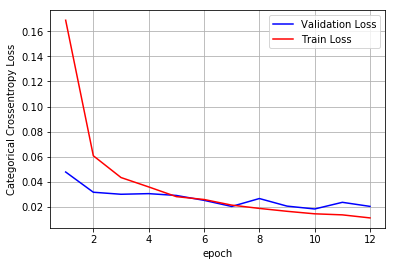

In [23]:
vy = history.history['val_loss']
ty = history.history['loss']
x = list(range(1,epochs+1))

plt_dynamic(x, vy, ty)

### 9x9 Kernel & 5x5 Pooling With Dropout And Batch Normalization

In [26]:
from keras.layers import BatchNormalization
epochs = 12
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(32, kernel_size=(9, 9),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (9, 9), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 105us/step - loss: 0.2288 - acc: 0.9304 - val_loss: 0.1582 - val_acc: 0.9511
Epoch 2/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0799 - acc: 0.9763 - val_loss: 0.0442 - val_acc: 0.9847
Epoch 3/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0566 - acc: 0.9832 - val_loss: 0.0343 - val_acc: 0.9889
Epoch 4/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0463 - acc: 0.9866 - val_loss: 0.0306 - val_acc: 0.9902
Epoch 5/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0406 - acc: 0.9877 - val_loss: 0.0421 - val_acc: 0.9872
Epoch 6/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0338 - acc: 0.9896 - val_loss: 0.0303 - val_acc: 0.9915
Epoch 7/12
60000/60000 [==============================

#### Plotting

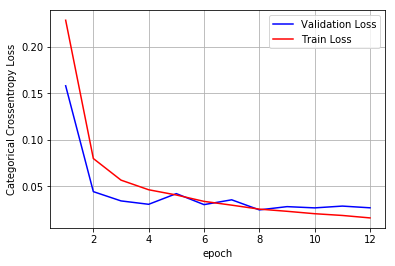

In [27]:
vy = history.history['val_loss']
ty = history.history['loss']
x = list(range(1,epochs+1))

plt_dynamic(x, vy, ty)

### Conclusion

In [28]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=['Kernel','Test Loss','Accuracy']
x.add_row(['3x3','0.238','99.15'])
x.add_row(['5x5','0.176','99.42'])
x.add_row(['7x7','0.206','99.39'])
x.add_row(['9x9','0.268','99.18'])
print(x)

+--------+-----------+----------+
| Kernel | Test Loss | Accuracy |
+--------+-----------+----------+
|  3x3   |   0.238   |  99.15   |
|  5x5   |   0.176   |  99.42   |
|  7x7   |   0.206   |  99.39   |
|  9x9   |   0.268   |  99.18   |
+--------+-----------+----------+


#### As we can see from the above table 5x5 got the highest accuracy among all other kernels